#TRAINING VIOLIN

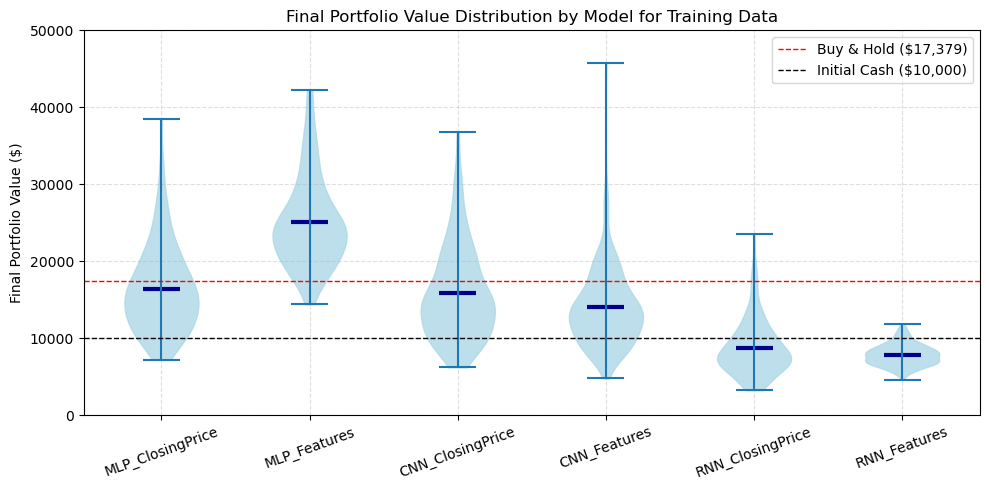

In [127]:
import pandas as pd
import matplotlib.pyplot as plt

# === CSV files with first column being final portfolio values ===
csv_files = {
    "MLP_ClosingPrice": "MLP_CP/MLP_Closing_200_final_pf.csv",
    "MLP_Features":     "MLP_Features/MLP_UNSEEN_TRAIN_ppo_final_portfolios.csv",
    "CNN_ClosingPrice": "CNN_Closing/cnn_close_train_final_portfolios.csv",
    "CNN_Features":     "CNN_Features/cnn_features_final_portfolios.csv",
    "RNN_ClosingPrice": "RNN_Closing/rnn_closing_train_final_portfolios.csv",
    "RNN_Features":     "RNN_Features/rnn_features_final_portfolios.csv",
}

model_names = []
pf_values = []

for model, path in csv_files.items():
    try:
        df = pd.read_csv(path, header=None)
        col = pd.to_numeric(df.iloc[:, 0], errors='coerce')
        col = col.dropna().values
        pf_values.append(col)
        model_names.append(model)
    except Exception as e:
        print(f"⚠️ Error reading {model}: {e}")

# === Plot ===
plt.style.use('default')
fig, ax = plt.subplots(figsize=(10, 5))

parts = ax.violinplot(pf_values, showmeans=True, showextrema=True, showmedians=False)

for pc in parts['bodies']:
    pc.set_facecolor('lightblue')
    pc.set_edgecolor('lightblue')
    pc.set_alpha(0.8)

parts['cmeans'].set_color('darkblue')
parts['cmeans'].set_linewidth(3)

# Add Buy & Hold line
ax.axhline(y=17379, color='red', linestyle='--', linewidth=1, label='Buy & Hold ($17,379)')
ax.axhline(y=10000, color='black',linestyle='--', linewidth=1, label='Initial Cash ($10,000)')
ax.legend()

ax.set_xticks(range(1, len(model_names)+1))
ax.set_xticklabels(model_names, rotation=20)
ax.set_title("Final Portfolio Value Distribution by Model for Training Data")
ax.set_ylabel("Final Portfolio Value ($)")
ax.set_ylim(0, 50000)
ax.grid(True, linestyle='--', alpha=0.4)

plt.tight_layout()
plt.savefig("final_portfolio_violin_TRAINING.png", dpi=600)
plt.show()


# UNSEEN DATA

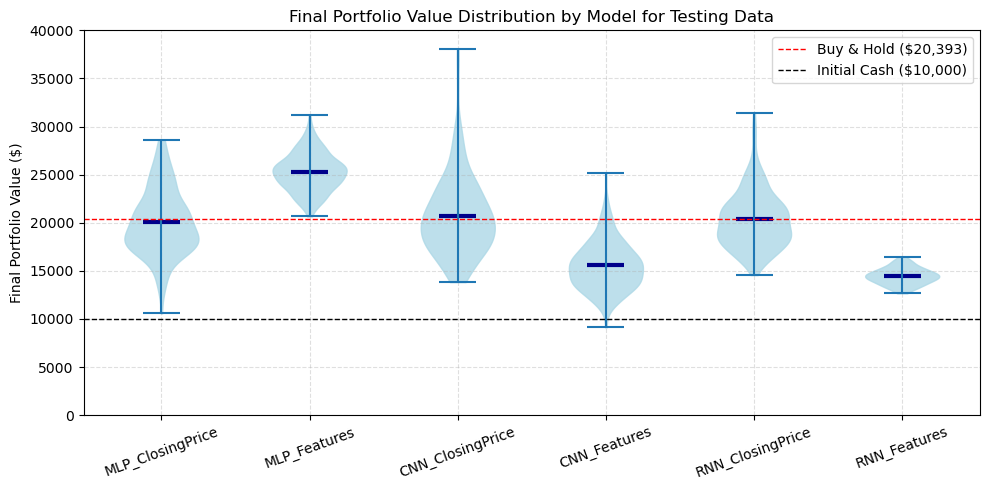

In [135]:
import pandas as pd
import matplotlib.pyplot as plt

# === CSV files with first column being final portfolio values ===
csv_files = {
    "MLP_ClosingPrice": "MLP_CP/mlp_cp_test_final_portfolios.csv",
    "MLP_Features":     "MLP_Features/ppo_final_portfolios_test.csv",
    "CNN_ClosingPrice": "CNN_Closing/cnn_test_final_portfolios.csv",
    "CNN_Features":     "CNN_Features/cnn_test_final_portfolios.csv",
    "RNN_ClosingPrice": "RNN_CP_Test_Results/final_portfolios.csv",
    "RNN_Features":     "FeatureStack_RNN_Results/final_portfolios1.csv",
}

model_names = []
pf_values = []

for model, path in csv_files.items():
    try:
        df = pd.read_csv(path, header=None)
        col = pd.to_numeric(df.iloc[:, 0], errors='coerce')
        col = col.dropna().values
        pf_values.append(col)
        model_names.append(model)
    except Exception as e:
        print(f"⚠️ Error reading {model}: {e}")

# === Plot ===
plt.style.use('default')
fig, ax = plt.subplots(figsize=(10, 5))

parts = ax.violinplot(pf_values, showmeans=True, showextrema=True, showmedians=False)

for pc in parts['bodies']:
    pc.set_facecolor('lightblue')
    pc.set_edgecolor('lightblue')
    pc.set_alpha(0.8)

parts['cmeans'].set_color('darkblue')
parts['cmeans'].set_linewidth(3)

# Add Buy & Hold line
ax.axhline(y=20393, color='red', linewidth=1, linestyle='--', label='Buy & Hold ($20,393)')
ax.axhline(y=10000, color='black', linewidth=1, linestyle='--', label='Initial Cash ($10,000)')

ax.legend()

ax.set_xticks(range(1, len(model_names)+1))
ax.set_xticklabels(model_names, rotation=20)
ax.set_title("Final Portfolio Value Distribution by Model for Testing Data")
ax.set_ylabel("Final Portfolio Value ($)")
ax.set_ylim(0, 40000)
ax.grid(True, linestyle='--', alpha=0.4)

plt.tight_layout()
plt.savefig("final_portfolio_violin_TESTING1.png", dpi=600)
plt.show()


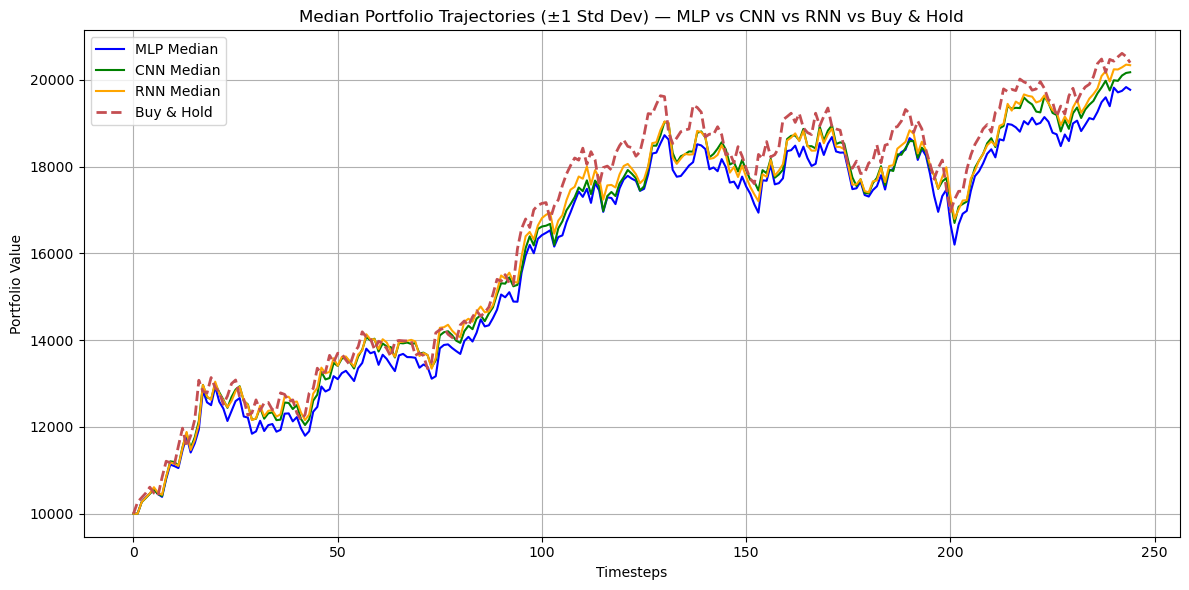

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

# === Load PPO trajectories ===
mlp_arr = pd.read_csv("MLP_CP/mlp_cp_test_all_trajectories.csv").values
cnn_arr = pd.read_csv("CNN_Closing/cnn_test_all_trajectories.csv").values
rnn_arr = pd.read_csv("RNN_CP_Test_Results/all_trajectories.csv").values


# === Load Buy & Hold data ===
with open("buyhold_2023_2024.pkl", "rb") as f:
    bh_data = pickle.load(f)
bh_curve = np.array(bh_data["curve"])

# === Compute statistics ===
def compute_stats(arr):
    median = np.median(arr, axis=1)  # across runs (columns)
    std = np.std(arr, axis=1)
    return median, std

mlp_median, mlp_std = compute_stats(mlp_arr)
cnn_median, cnn_std = compute_stats(cnn_arr)
rnn_median, rnn_std = compute_stats(rnn_arr)

# === Truncate to shortest curve length ===
min_len = min(len(mlp_median), len(cnn_median), len(rnn_median), len(bh_curve))

mlp_median, mlp_std = mlp_median[:min_len], mlp_std[:min_len]
cnn_median, cnn_std = cnn_median[:min_len], cnn_std[:min_len]
rnn_median, rnn_std = rnn_median[:min_len], rnn_std[:min_len]
bh_curve = bh_curve[:min_len]

# === Plot all curves ===
plt.figure(figsize=(12, 6))

# MLP
plt.plot(mlp_median, label="MLP Median", color='blue')
#plt.fill_between(range(min_len), mlp_median - mlp_std, mlp_median + mlp_std, color='blue', alpha=0.2)

# CNN
plt.plot(cnn_median, label="CNN Median", color='green')
#plt.fill_between(range(min_len), cnn_median - cnn_std, cnn_median + cnn_std, color='green', alpha=0.2)

# RNN
plt.plot(rnn_median, label="RNN Median", color='orange')
#plt.fill_between(range(min_len), rnn_median - rnn_std, rnn_median + rnn_std, color='orange', alpha=0.2)

# Buy & Hold
plt.plot(bh_curve, 'r--', linewidth=2, label="Buy & Hold")

plt.title("Median Portfolio Trajectories (±1 Std Dev) — MLP vs CNN vs RNN vs Buy & Hold")
plt.xlabel("Timesteps")
plt.ylabel("Portfolio Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("model_comparison_trajectories.png", dpi=600)
plt.show()


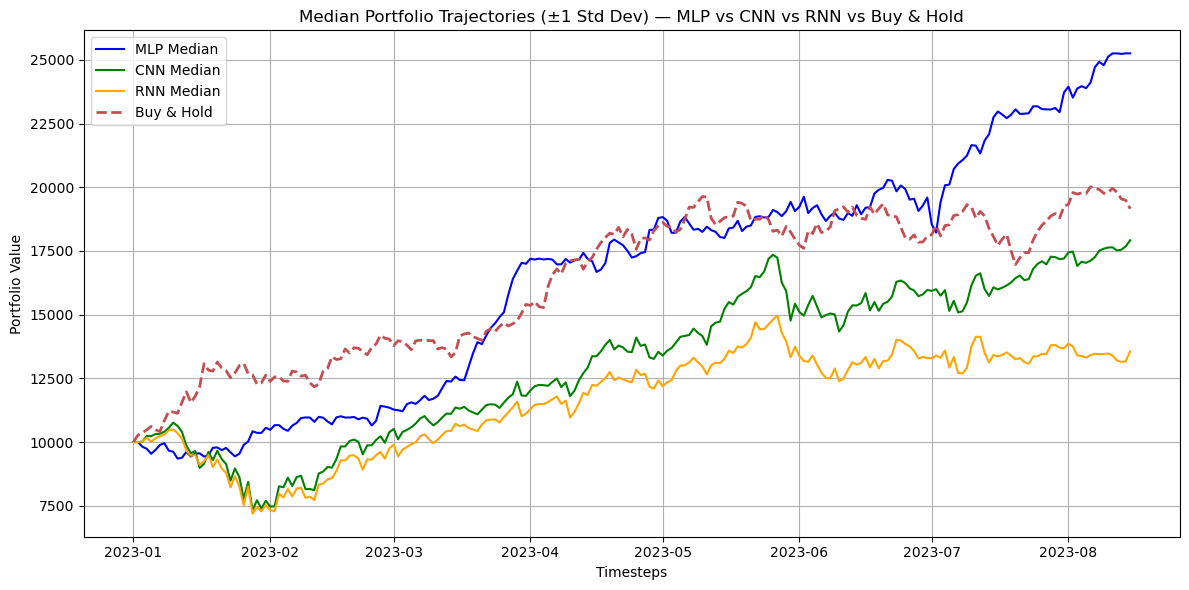

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import matplotlib.dates as mdates


# === Load PPO trajectories ===
mlp_arr = pd.read_csv("MLP_Features/ppo_all_trajectories_test.csv").values
cnn_arr = pd.read_csv("CNN_Features/cnn_features_all_trajectories.csv").values
rnn_arr = pd.read_csv("RNN_Features/rnn_features_all_trajectories.csv").values


# === Load Buy & Hold data ===
with open("buyhold_2023_2024.pkl", "rb") as f:
    bh_data = pickle.load(f)
bh_curve = np.array(bh_data["curve"])
date_range = pd.date_range(start="2023-01-01", periods=min_len, freq="D")

# === Compute statistics ===
def compute_stats(arr):
    median = np.median(arr, axis=1)  # across runs (columns)
    std = np.std(arr, axis=1)
    return median, std

mlp_median, mlp_std = compute_stats(mlp_arr)
cnn_median, cnn_std = compute_stats(cnn_arr)
rnn_median, rnn_std = compute_stats(rnn_arr)

# === Truncate to shortest curve length ===
min_len = min(len(mlp_median), len(cnn_median), len(rnn_median), len(bh_curve))

mlp_median, mlp_std = mlp_median[:min_len], mlp_std[:min_len]
cnn_median, cnn_std = cnn_median[:min_len], cnn_std[:min_len]
rnn_median, rnn_std = rnn_median[:min_len], rnn_std[:min_len]
bh_curve = bh_curve[:min_len]

# === Plot all curves ===
plt.figure(figsize=(12, 6))

# MLP
plt.plot(date_range, mlp_median, label="MLP Median", color='blue')
#plt.fill_between(range(min_len), mlp_median - mlp_std, mlp_median + mlp_std, color='blue', alpha=0.2)

# CNN
plt.plot(date_range, cnn_median, label="CNN Median", color='green')
#plt.fill_between(range(min_len), cnn_median - cnn_std, cnn_median + cnn_std, color='green', alpha=0.2)

# RNN
plt.plot(date_range, rnn_median, label="RNN Median", color='orange')
#plt.fill_between(range(min_len), rnn_median - rnn_std, rnn_median + rnn_std, color='orange', alpha=0.2)

# Buy & Hold
plt.plot(date_range,bh_curve, 'r--', linewidth=2, label="Buy & Hold")

plt.title("Median Portfolio Trajectories (±1 Std Dev) — MLP vs CNN vs RNN vs Buy & Hold")
plt.xlabel("Timesteps")
plt.ylabel("Portfolio Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("model_comparison_trajectories_dated.png", dpi=600)
plt.show()

/var/folders/1b/2dv3_3nx66s3980gg6hg5g1m0000gn/T/ipykernel_23739/1576438390.py:62: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(date_range, bh_curve, 'r--', linewidth=1, color='black', label="Buy & Hold")


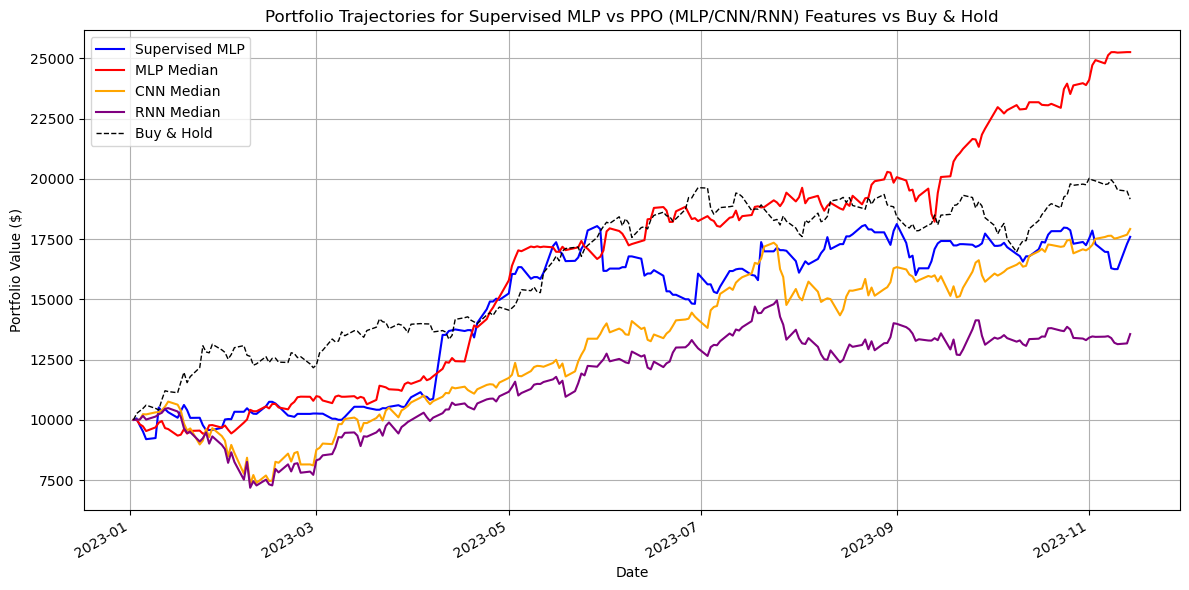

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import matplotlib.dates as mdates

# === Load Supervised MLP trajectory ===
sup_mlp_df = pd.read_csv("Supervised MLP/5day_model_daily_trajectory.csv")
sup_mlp_arr = sup_mlp_df["PortfolioValue"].values

# === Load PPO trajectories ===
mlp_arr = pd.read_csv("MLP_Features/ppo_all_trajectories_test.csv").values
cnn_arr = pd.read_csv("CNN_Features/cnn_features_all_trajectories.csv").values
rnn_arr = pd.read_csv("RNN_Features/rnn_features_all_trajectories.csv").values

# === Transpose if shape is (runs, timesteps) instead of (timesteps, runs) ===
if mlp_arr.shape[0] < mlp_arr.shape[1]:
    mlp_arr = mlp_arr.T
if cnn_arr.shape[0] < cnn_arr.shape[1]:
    cnn_arr = cnn_arr.T
if rnn_arr.shape[0] < rnn_arr.shape[1]:
    rnn_arr = rnn_arr.T

# === Load Buy & Hold data ===
with open("buyhold_2023_2024.pkl", "rb") as f:
    bh_data = pickle.load(f)
bh_curve = np.array(bh_data["curve"])

# === Compute statistics ===
def compute_stats(arr):
    median = np.median(arr, axis=1)
    std = np.std(arr, axis=1)
    return median, std

mlp_median, mlp_std = compute_stats(mlp_arr)
cnn_median, cnn_std = compute_stats(cnn_arr)
rnn_median, rnn_std = compute_stats(rnn_arr)

# === Truncate all arrays to the same minimum length ===
min_len = min(
    len(mlp_median), len(cnn_median),
    len(rnn_median), len(bh_curve),
    len(sup_mlp_arr)
)

mlp_median, mlp_std = mlp_median[:min_len], mlp_std[:min_len]
cnn_median, cnn_std = cnn_median[:min_len], cnn_std[:min_len]
rnn_median, rnn_std = rnn_median[:min_len], rnn_std[:min_len]
bh_curve = bh_curve[:min_len]
sup_mlp_arr = sup_mlp_arr[:min_len]

# === Create matching date range ===
date_range = pd.date_range(start="2023-01-01", periods=min_len, freq="B")

# === Plot all curves ===
plt.figure(figsize=(12, 6))

plt.plot(date_range, sup_mlp_arr, label="Supervised MLP", color='blue',)
plt.plot(date_range, mlp_median, label="MLP Median", color='red')
plt.plot(date_range, cnn_median, label="CNN Median", color='orange')
plt.plot(date_range, rnn_median, label="RNN Median", color='purple')
plt.plot(date_range, bh_curve, 'r--', linewidth=1, color='black', label="Buy & Hold")

plt.title("Portfolio Trajectories for Supervised MLP vs PPO (MLP/CNN/RNN) Features vs Buy & Hold")
plt.xlabel("Date")
plt.ylabel("Portfolio Value ($)")
plt.legend()
plt.grid(True)

# Format the x-axis as dates
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.gcf().autofmt_xdate()

plt.tight_layout()
plt.savefig("model_comparison_all_inclusive1.png", dpi=600)
plt.show()


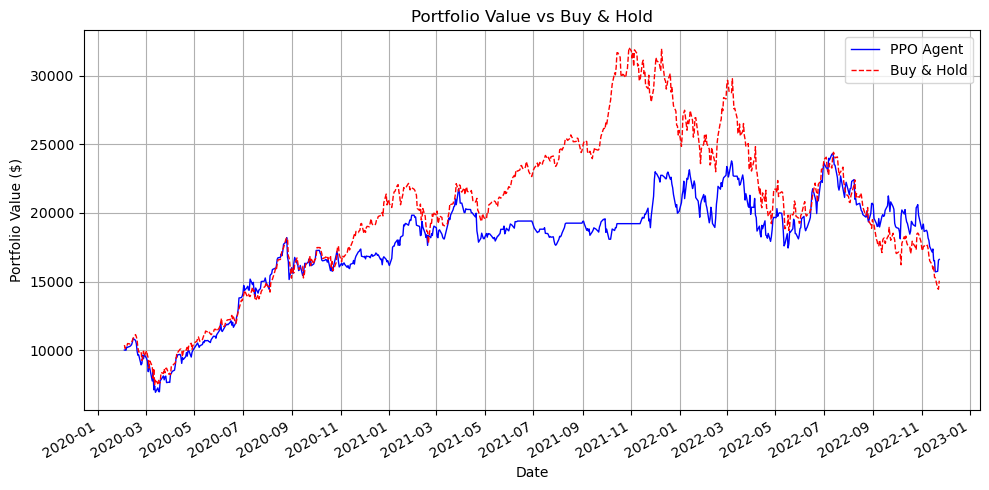

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import matplotlib.dates as mdates

# === Load PPO MLP-Features trajectories into a DataFrame ===
mlp_df = pd.read_csv("MLP_Features/training_ppo_all_trajectories.csv")

# === Select column 22 (0-based index) ===
col_idx = 3
if col_idx < 0 or col_idx >= mlp_df.shape[1]:
    raise IndexError(f"Column index {col_idx} is out of range for this DataFrame.")
series = mlp_df.iloc[:, col_idx].values
label_mlp = "PPO Agent"

# === Load Buy & Hold data and drop first 20 days ===
with open("buyhold_2020_2023.pkl", "rb") as f:
    bh_data = pickle.load(f)
bh_curve_full = np.array(bh_data["curve"])
bh_curve = bh_curve_full[1:]  # remove first 20 days

# === Truncate to same length ===
min_len = min(len(series), len(bh_curve))
series   = series[:min_len]
bh_curve = bh_curve[:min_len]

# === Create matching business-day date range ===
date_range = pd.date_range(start="2020-02-01", periods=min_len, freq="B")

# === Plot the selected MLP column vs Buy & Hold (first 20 BH days removed) ===
plt.figure(figsize=(10, 5))
plt.plot(
    date_range,
    series,
    label=label_mlp,
    color='blue',
    linewidth=1
)
plt.plot(
    date_range,
    bh_curve,
    label="Buy & Hold",
    color='red',
    linestyle='--',
    linewidth=1
)

plt.title("Portfolio Value vs Buy & Hold")
plt.xlabel("Date")
plt.ylabel("Portfolio Value ($)")
plt.legend()
plt.grid(True)

# Format x-axis as Year-Month
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.gcf().autofmt_xdate()

plt.tight_layout()
plt.savefig("PF_DOWNNN_GOOD.png", dpi=300)
plt.show()


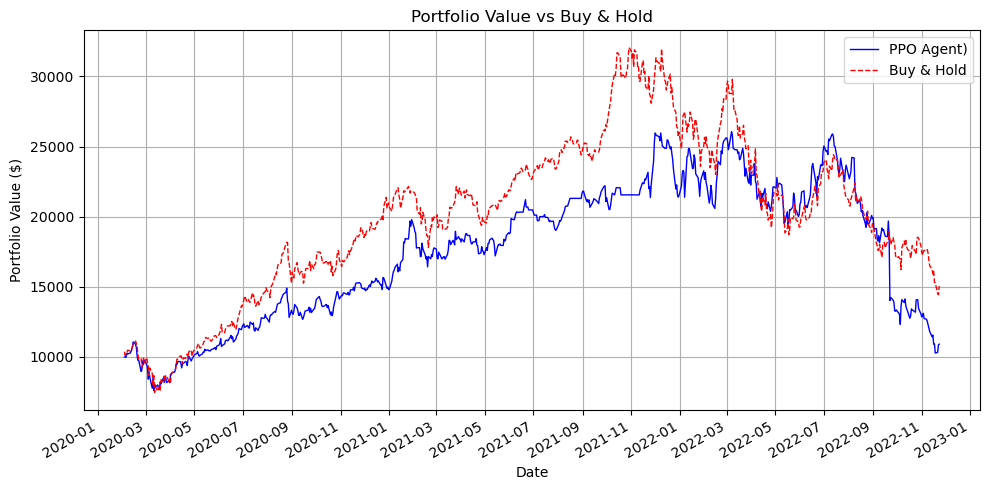

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import matplotlib.dates as mdates

# === Load PPO MLP-Features trajectories into a DataFrame ===
mlp_df = pd.read_csv("MLP_Features/training_ppo_all_trajectories.csv")

# === Find the column whose trajectory has the minimum value in the final row ===
last_row = mlp_df.iloc[-1, :]
min_col_idx = int(last_row.values.argmin())
series = mlp_df.iloc[:, min_col_idx].values
label_mlp = f"PPO Agent)"

# === Load Buy & Hold data and drop its first row ===
with open("buyhold_2020_2023.pkl", "rb") as f:
    bh_data = pickle.load(f)
bh_curve_full = np.array(bh_data["curve"], dtype=float)
bh_curve = bh_curve_full[1:]  # drop the very first point

# === Truncate to same length ===
min_len = min(len(series), len(bh_curve))
series   = series[:min_len]
bh_curve = bh_curve[:min_len]

# === Create matching business-day date range ===
date_range = pd.date_range(start="2020-02-01", periods=min_len, freq="B")

# === Plot the trajectory with the minimum final value vs Buy & Hold ===
plt.figure(figsize=(10, 5))
plt.plot(
    date_range,
    series,
    label=label_mlp,
    color='blue',
    linewidth=1
)
plt.plot(
    date_range,
    bh_curve,
    label="Buy & Hold",
    color='red',
    linestyle='--',
    linewidth=1
)

plt.title("Portfolio Value vs Buy & Hold")
plt.xlabel("Date")
plt.ylabel("Portfolio Value ($)")
plt.legend()
plt.grid(True)

# Format x-axis as Year-Month
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.gcf().autofmt_xdate()

plt.tight_layout()
plt.savefig("PF_DOWNNN.png", dpi=300)
plt.show()


733 733


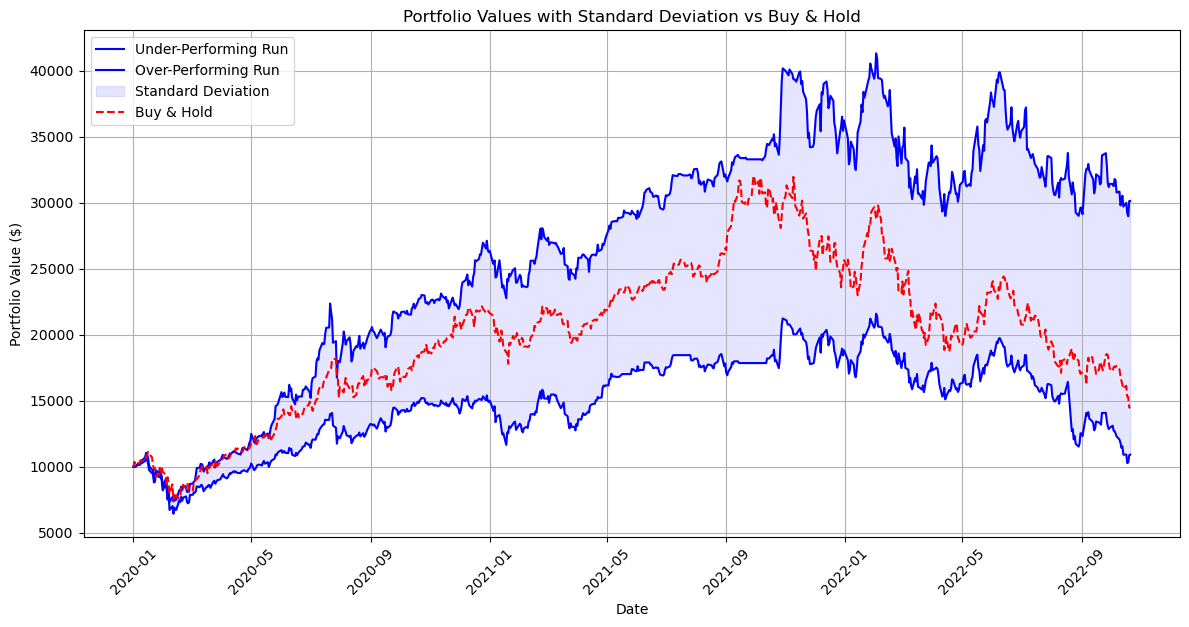

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

# === Load PPO MLP trajectories ===
mlp_arr = pd.read_csv("training_ppo_all_trajectories.csv").values

# === Load Buy & Hold data ===
with open("buyhold_2020_2023.pkl", "rb") as f:
    bh_data = pickle.load(f)
bh_curve = np.array(bh_data["curve"])

# === Compute 20th and 80th percentile for MLP only ===
mlp_20 = np.percentile(mlp_arr, 0, axis=1)
mlp_80 = np.percentile(mlp_arr, 80, axis=1)

# === Truncate to shortest curve length ===
min_len = min(len(mlp_20), len(bh_curve))
mlp_20, mlp_80 = mlp_20[:min_len], mlp_80[:min_len]
bh_curve = bh_curve[:min_len]

print(len(mlp_20), len(bh_curve))

# === Date range for plotting ===
date_range = pd.date_range(start="2020-01-01", end="2023-01-01", freq="B")
# === Generate full date range ===
date_range = pd.date_range(start="2020-01-01", end="2023-01-01", freq="B")

# === Ensure all arrays are the same length ===
min_len = min(len(date_range), len(mlp_20), len(mlp_80), len(bh_curve))

# === Truncate everything to min_len ===
date_range = date_range[:min_len]
mlp_20     = mlp_20[:min_len]
mlp_80     = mlp_80[:min_len]
bh_curve   = bh_curve[:min_len]

# === Plotting ===
plt.figure(figsize=(12, 6))
plt.plot(date_range, mlp_20, label="Under-Performing Run", color='blue')
plt.plot(date_range, mlp_80, label="Over-Performing Run", color='blue')
plt.fill_between(date_range, mlp_20, mlp_80, color='blue', alpha=0.1, label="Standard Deviation")
plt.plot(date_range, bh_curve, label="Buy & Hold", linestyle="--", color='red')

plt.title("Portfolio Values with Standard Deviation vs Buy & Hold")
plt.xlabel("Date")
plt.ylabel("Portfolio Value ($)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.savefig("mlp_percentiles_vs_buyhold1.png", dpi=300)
plt.show()


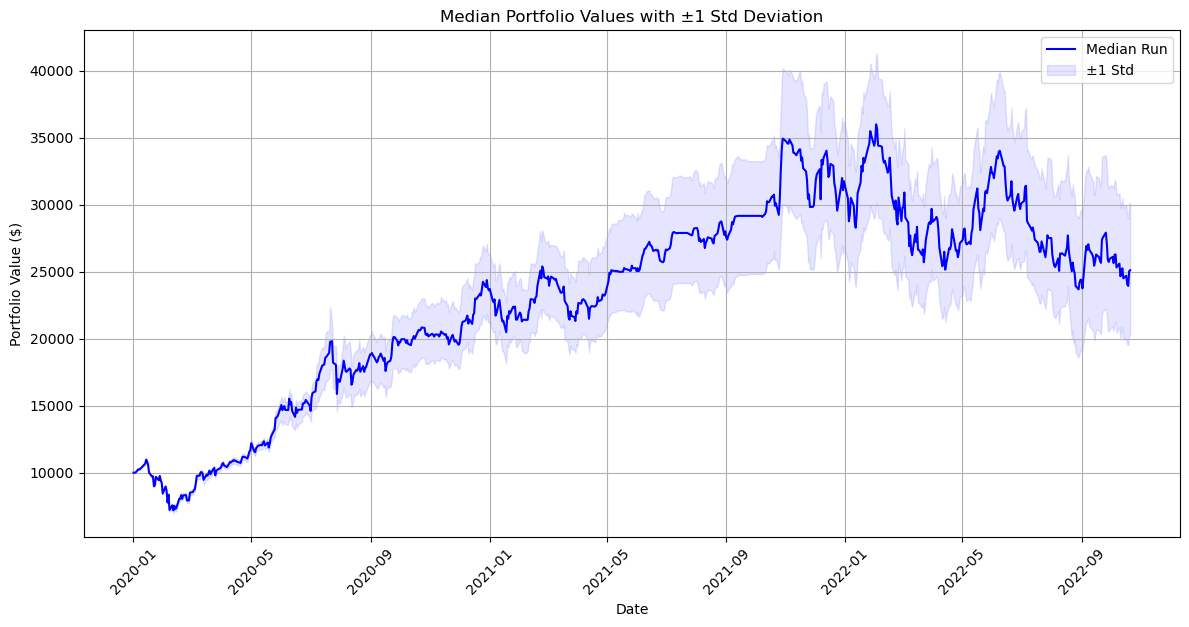

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# === Load PPO MLP trajectories ===
mlp_arr = pd.read_csv("training_ppo_all_trajectories.csv").values

# === Compute median, 40th, and 160th values per time step ===
mlp_sorted = np.sort(mlp_arr, axis=1)
mlp_median = np.median(mlp_sorted, axis=1)
mlp_40 = mlp_sorted[:, 39]   # 40th in 0-based index
mlp_160 = mlp_sorted[:, 159] # 160th in 0-based index

# === Date range for plotting ===
date_range = pd.date_range(start="2020-01-01", end="2023-01-01", freq="B")

# === Ensure all arrays are the same length ===
min_len = min(len(date_range), len(mlp_median), len(mlp_40), len(mlp_160))

# === Truncate to match minimum length ===
date_range = date_range[:min_len]
mlp_median = mlp_median[:min_len]
mlp_40     = mlp_40[:min_len]
mlp_160    = mlp_160[:min_len]

# === Plotting ===
plt.figure(figsize=(12, 6))
plt.plot(date_range, mlp_median, label="Median Run", color='blue')
plt.fill_between(date_range, mlp_40, mlp_160, color='blue', alpha=0.1, label="±1 Std")
plt.title("Median Portfolio Values with ±1 Std Deviation")
plt.xlabel("Date")
plt.ylabel("Portfolio Value ($)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.savefig("mlp_median_std.png", dpi=300)
plt.show()
